# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_results = pd.merge(study_results, mouse_metadata)

# Display the data table for prview
mouse_study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
mouse_dupl = mouse_study_results["Mouse ID"].count()
mouse_dupl

1893

In [3]:
# Checking the number of mice.
mouse_total = mouse_study_results["Mouse ID"].nunique(0)
mouse_total


249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

mouse_dupl_id = mouse_study_results[mouse_study_results.duplicated(subset=["Mouse ID", "Timepoint"])]["Mouse ID"]
mouse_dupl_id.head(1)

861    g989
Name: Mouse ID, dtype: object

In [5]:
# Optional: Get all the data for the duplicate mouse ID.

mouse_dupl_id = mouse_study_results[mouse_study_results.duplicated(subset=["Mouse ID", "Timepoint"])]
mouse_dupl_id.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_id = mouse_study_results.drop_duplicates('Mouse ID')
mouse_id.head() 



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
10,f932,0,45.0,0,Ketapril,Male,15,29
11,g107,0,45.0,0,Ketapril,Female,2,29
19,a457,0,45.0,0,Ketapril,Female,11,30
22,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.(minus head row)
number_of_mice =mouse_id["Mouse ID"].count()-1
number_of_mice



248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
#non_dupl_data = mouse_id[["Drug Regimen", "Tumor Volumne (mm3)"]]
#summary_stats_regimen = mouse_id.groupby("Drug Regimen")
summary_stats_regimen = mouse_study_results.groupby("Drug Regimen")

# Assemble the resulting series into a single summary DataFrame.

#Tumor_mean = summary_stats_regimen.mean()["Tumor Volume (mm3)"]

summary = pd.DataFrame({"mean" : summary_stats_regimen.mean()["Tumor Volume (mm3)"],
                        "median" : summary_stats_regimen.median()["Tumor Volume (mm3)"],
                        "var" :summary_stats_regimen.var()["Tumor Volume (mm3)"],
                        "std." :summary_stats_regimen.std()["Tumor Volume (mm3)"],
                        "sem" :summary_stats_regimen.sem()["Tumor Volume (mm3)"]})
summary




,mean,median,var,std.,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
#non_dupl_data = mouse_id[["Drug Regimen", "Tumor Volumne (mm3)"]]
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
#agg_data = summary.groupby("Drug Regimen").index.name = ({"Tumor Volume (mm3)":["mean","median","var", "std","sem"]})
                                      #.aggregate({"Tumor Volume (mm3)":["MeanTumor Volume"]})
#.agg()({"Tumor Volume (mm3)": ["mean","median", "variance", "standard deviation", "SEM"]}
#agg_data 

regimens = mouse_study_results.groupby(['Mouse ID', "Drug Regimen"])
tot_regiments = regimens.sum()
tot_regiments.head()

,,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
Mouse ID,Drug Regimen,,,,,
a203,Infubinol,225,563.127077,11,200,230
a251,Infubinol,225,552.370946,8,210,250
a262,Placebo,225,586.116306,23,170,290
a275,Ceftamin,225,527.709651,12,200,280
a366,Stelasyn,105,382.479341,1,112,203


## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen'>

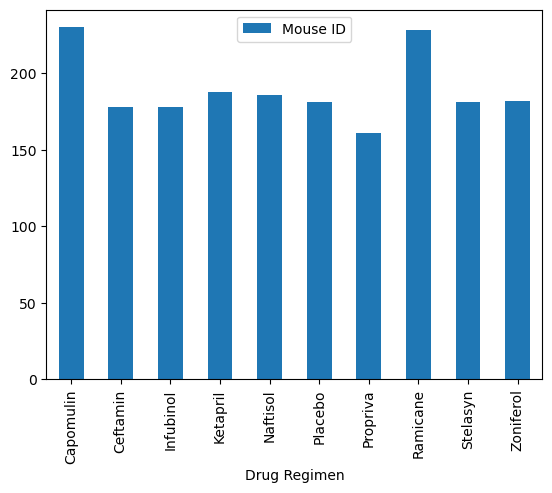

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoints = mouse_study_results[["Drug Regimen", "Mouse ID"]]
timepoints_drugreg = timepoints.groupby(["Drug Regimen"]).count()
timepoints_drugreg.plot(kind= "bar")




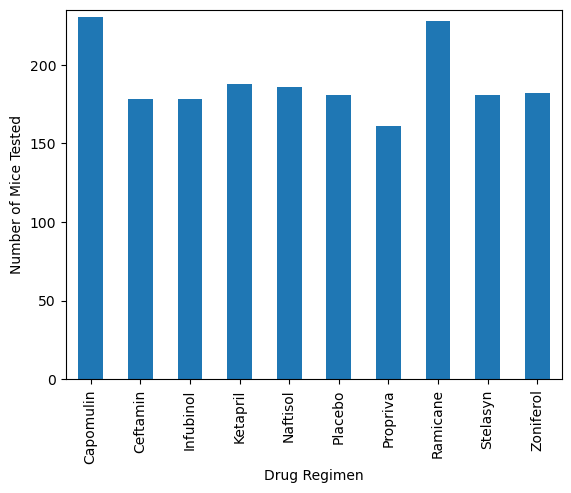

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

timepoints = mouse_study_results[["Drug Regimen", "Mouse ID"]]
timepoints_drugreg = timepoints.groupby(["Drug Regimen"]).count()
timepoints_drugreg.plot(kind= "bar")
plt.ylim((0, 235))
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.legend().set_visible(False)
plt.show()  

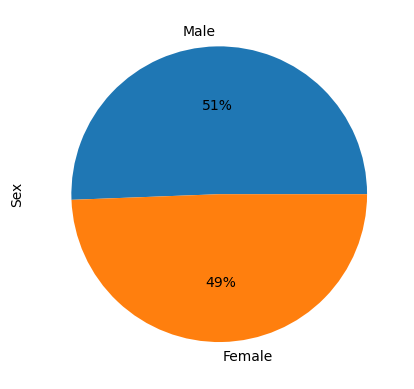

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_count = mouse_study_results["Sex"].value_counts(0)
explode = [0.0, 0]
gender_count.plot(kind="pie", autopct="%1.0f%%", explode=explode)
gender_count.plot(legend=False)
plt.show()

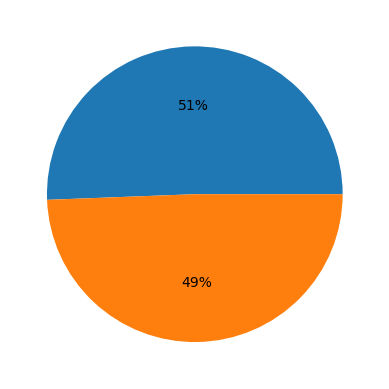

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

colors = ["tab:blue", "tab:orange"]
explode = [0.0, 0]
genders = gender_count.index.values.tolist()
plt.pie(gender_count, explode=explode, colors=colors, autopct="%1.0f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
mouse_study_results.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
 4   Drug Regimen        1893 non-null   object 
 5   Sex                 1893 non-null   object 
 6   Age_months          1893 non-null   int64  
 7   Weight (g)          1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [15]:
df = mouse_study_results
df["Mouse ID"].unique().shape
df.shape

(1893, 8)

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
regimen = mouse_study_results.loc[(mouse_study_results["Drug Regimen"] == "Capomulin") |
                                  (mouse_study_results["Drug Regimen"] == "Ramicane") |
                                  (mouse_study_results["Drug Regimen"] == "Infubinol") |
                               (mouse_study_results["Drug Regimen"] == "Ceftamin"),:]

# Start by getting the last (greatest) timepoint for each mouse
regimen_last_group = regimen.groupby("Mouse ID").max()["Timepoint"]

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
regimen_last_group = pd.merge(regimen_last_group, mouse_study_results, on=("Mouse ID", "Timepoint"))
regimen_last_group.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25


In [25]:
# Put treatments into a list for for loop (and later for plot labels)
drugs_name = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
tumor_analysis = []

for regimen in drugs_name:
    tumor_volumes = regimen_last_group.loc[regimen_last_group["Drug Regimen"] == regimen, "Tumor Volume (mm3)"]
    #tumor_analysis.append(tumor_cnt)
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # add subset 
   
    tumor_analysis.append(tumor_volumes)
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    quartiles = tumor_volumes.quantile([0.25, 0.50, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
  
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    print(f"{regimen} outliers could be below {lower_bound:.2f} mm3 or above {upper_bound:.2f} mm3") 
    outliers = tumor_volumes.loc [(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    if not outliers.empty:
        print(f"{regimen} Has outliers")
    else:
        print(f"{regimen} Has no outliers")

Capomulin outliers could be below 20.70 mm3 or above 51.83 mm3
Capomulin Has no outliers
Ramicane outliers could be below 17.91 mm3 or above 54.31 mm3
Ramicane Has no outliers
Infubinol outliers could be below 36.83 mm3 or above 82.74 mm3
Infubinol Has outliers
Ceftamin outliers could be below 25.36 mm3 or above 87.67 mm3
Ceftamin Has no outliers


summary_stats_table_assort_df = mouse_study_results.sort_values("Mean of Tumor Volume", ascending=True)
summary_stats_table_assort_df

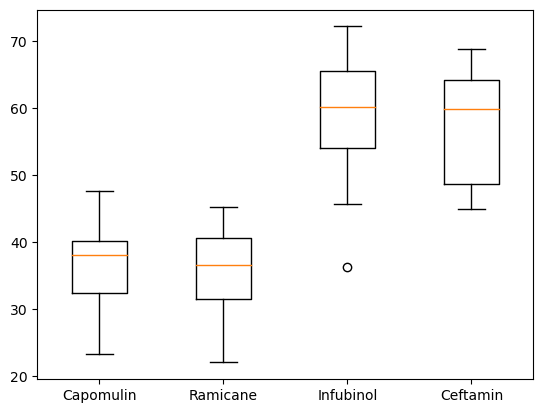

In [32]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_analysis, labels=drugs_name) ;



## Line and Scatter Plots

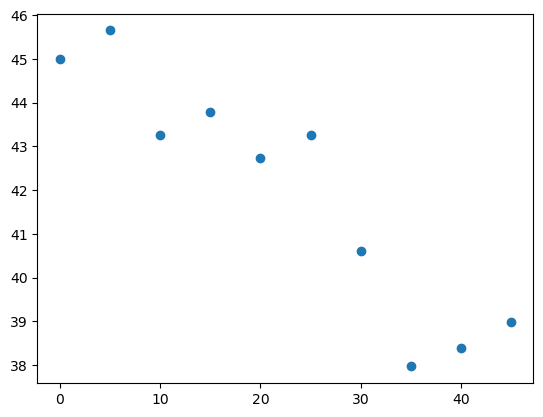

In [38]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin = mouse_study_results.loc[mouse_study_results["Drug Regimen"] == "Capomulin",:]
capomulin_mouse = capomulin.iloc[0]["Mouse ID"]
df = capomulin.loc[capomulin["Mouse ID"] == capomulin_mouse, :]
x = df["Timepoint"]
y = df["Tumor Volume (mm3)"]
plt.scatter(x, y)

In [20]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen



## Correlation and Regression

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

